<a href="https://colab.research.google.com/github/ksenera/jupyter_notebooks/blob/main/LinearRegressionHoneyProductSKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file implements Normal Regression to solve linear regression problem for the honeybee production example.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [9]:
from pandas.io.formats.format import set_option
datafile="honeyproduction.csv"
DataReader=open(datafile,mode='rt')
DataRaw=pd.read_csv(DataReader)
DataRaw.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


In [10]:
YearData=DataRaw.groupby(['year'])
print(YearData.head())
NumColonies=YearData.numcol.sum().reset_index()
print(NumColonies.head(15))

    state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0      AL   16000.0           71   1136000.0    159000.0        0.72   
1      AZ   55000.0           60   3300000.0   1485000.0        0.64   
2      AR   53000.0           65   3445000.0   1688000.0        0.59   
3      CA  450000.0           83  37350000.0  12326000.0        0.62   
4      CO   27000.0           72   1944000.0   1594000.0        0.70   
..    ...       ...          ...         ...         ...         ...   
586    AL    8000.0           54    432000.0     65000.0        2.47   
587    AZ   22000.0           46   1012000.0    253000.0        1.79   
588    AR   25000.0           63   1575000.0    189000.0        1.98   
589    CA  330000.0           35  11550000.0   3119000.0        1.94   
590    CO   25000.0           48   1200000.0    468000.0        2.07   

      prodvalue  year  
0      818000.0  1998  
1     2112000.0  1998  
2     2033000.0  1998  
3    23157000.0  1998  
4     1361000.0

<function matplotlib.pyplot.show(close=None, block=None)>

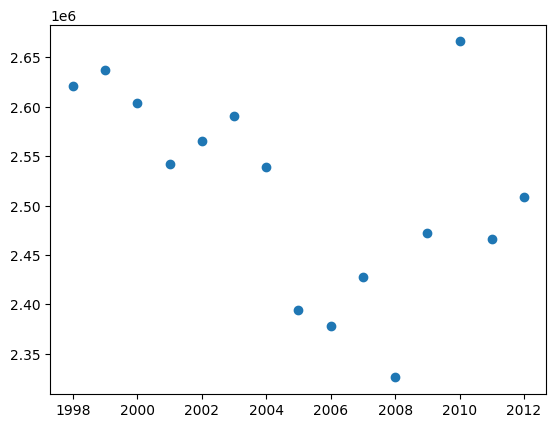

In [12]:
xData=NumColonies['year']
yData=NumColonies['numcol']
plt.scatter(xData,yData)
plt.show

The intercept of the linear model is: 23883438.09523809


<function matplotlib.pyplot.show(close=None, block=None)>

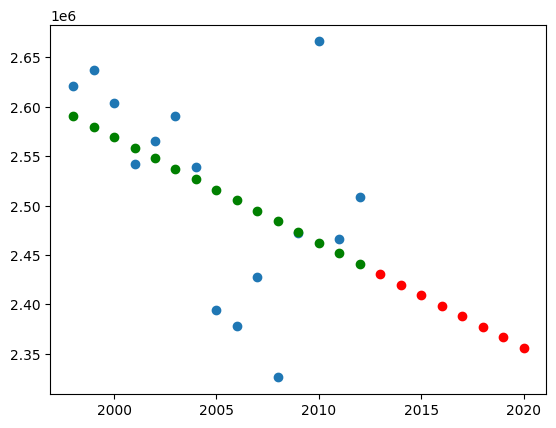

In [13]:
#import sklearn
from sklearn.linear_model import LinearRegression
x1=xData.values
model=LinearRegression()
xModel=x1.reshape(-1,1)
model.fit(xModel,yData)
print("The intercept of the linear model is:", model.intercept_)
#print(model.coef_)
#print(model.intercept_)
y_hat=model.predict(xModel)
x_beyond=np.array(range(2013,2021))
x_beyond=x_beyond.reshape(-1,1)
y_beyond=model.predict(x_beyond)
plt.scatter(xModel,yData)
plt.scatter(xModel,y_hat,color='g')
plt.scatter(x_beyond,y_beyond,color='r')
plt.show